In [38]:
words = open('names.txt', 'r').read().splitlines()

In [39]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [40]:
{'min_word_length': min(len(w) for w in words), 'max_word_length': max(len(w) for w in words)}

{'min_word_length': 2, 'max_word_length': 15}

In [41]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [42]:
import torch
N = torch.zeros((28, 28), dtype=torch.int32)

In [43]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [44]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

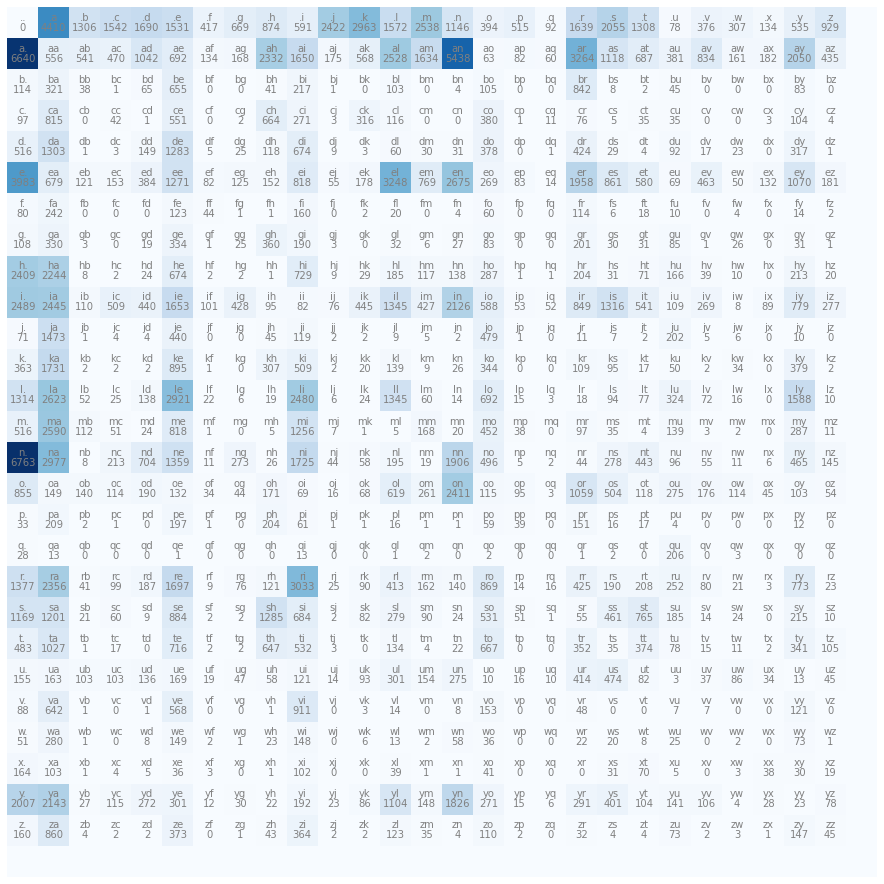

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        ax.text(j, i, chstr, ha='center', va='bottom', color='gray')
        ax.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
ax.set_axis_off()

In [46]:
p = N[0].float()
p /= p.sum()

In [54]:
g = torch.Generator().manual_seed(22)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'u'